In [1]:
from keras.models import load_model
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from utils import *
%matplotlib inline

Using TensorFlow backend.
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python

In [2]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        list_files = os.listdir(os.path.join(path, i))
        if len(list_files) > 10:
            for f in list_files:
                # Check file extension. Allow only jpg/jpeg' files.
                ext = os.path.splitext(f)[1]
                if ext == '.jpg' or ext == '.jpeg':
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [3]:
#memuat model
model = load_model('model-resnet50_PENTING/_Resnet50R_.18-0.90.hdf5',compile=False)
metadata = load_metadata('food-50-aug/test/')
print(f'Test data: {len(metadata)}')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Test data: 12500


In [4]:
def recognize(img):
    prediction = model.predict(np.expand_dims(img, axis=0))[0]

    return prediction

In [5]:
import pyprind


labels = pickle.load(open('label/label_50kelas','rb'))
y_pred = []

bar = pyprind.ProgBar(len(metadata),monitor=True, title='Proses Pengujian')
for data in metadata:
    path = data.image_path()
    img = load_img(path, target_size=(224, 224))
    img = img_to_array(img)
    pred = recognize(img)
    label = labels[np.argmax(pred)]
    y_pred.append(label)
    bar.update()
print(bar)

Proses Pengujian
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:30:28


Title: Proses Pengujian
  Started: 07/14/2020 11:34:08
  Finished: 07/14/2020 12:04:37
  Total time elapsed: 00:30:28
  CPU %: 1053.50
  Memory %: 10.40


In [6]:
y_true = [data.name for data in metadata]

true_count = 0
for true, pred in zip(y_true, y_pred):
    if true == pred:
        true_count += 1
        
acc = (true_count/len(y_true)) * 100
print(f'Overall Accuracy: {acc}%')

Overall Accuracy: 89.584%


In [7]:
#library cnf_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
%%time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Wall time: 0 ns


In [9]:
print(classification_report(y_true, y_pred, labels=labels))

                       precision    recall  f1-score   support

              baklava       0.87      0.90      0.89       250
             beignets       0.84      0.91      0.88       250
             bibimbap       0.92      0.91      0.91       250
         caesar_salad       0.84      0.89      0.86       250
              cannoli       0.91      0.85      0.88       250
        chicken_wings       0.86      0.93      0.89       250
       chocolate_cake       0.82      0.87      0.84       250
              churros       0.89      0.87      0.88       250
         clam_chowder       0.93      0.92      0.93       250
        club_sandwich       0.91      0.91      0.91       250
         creme_brulee       0.93      0.92      0.93       250
            cup_cakes       0.88      0.90      0.89       250
         deviled_eggs       0.92      0.93      0.92       250
               donuts       0.91      0.77      0.84       250
            dumplings       0.91      0.90      0.91  

Confusion Matrix, Tanpa Normalisasi
[[226   3   0 ...   1   0   2]
 [  1 228   0 ...   0   1   2]
 [  0   0 227 ...   0   0   2]
 ...
 [  2   1   0 ... 206   0   2]
 [  0   3   1 ...   1 219   2]
 [  0   2   0 ...   0   0 222]]


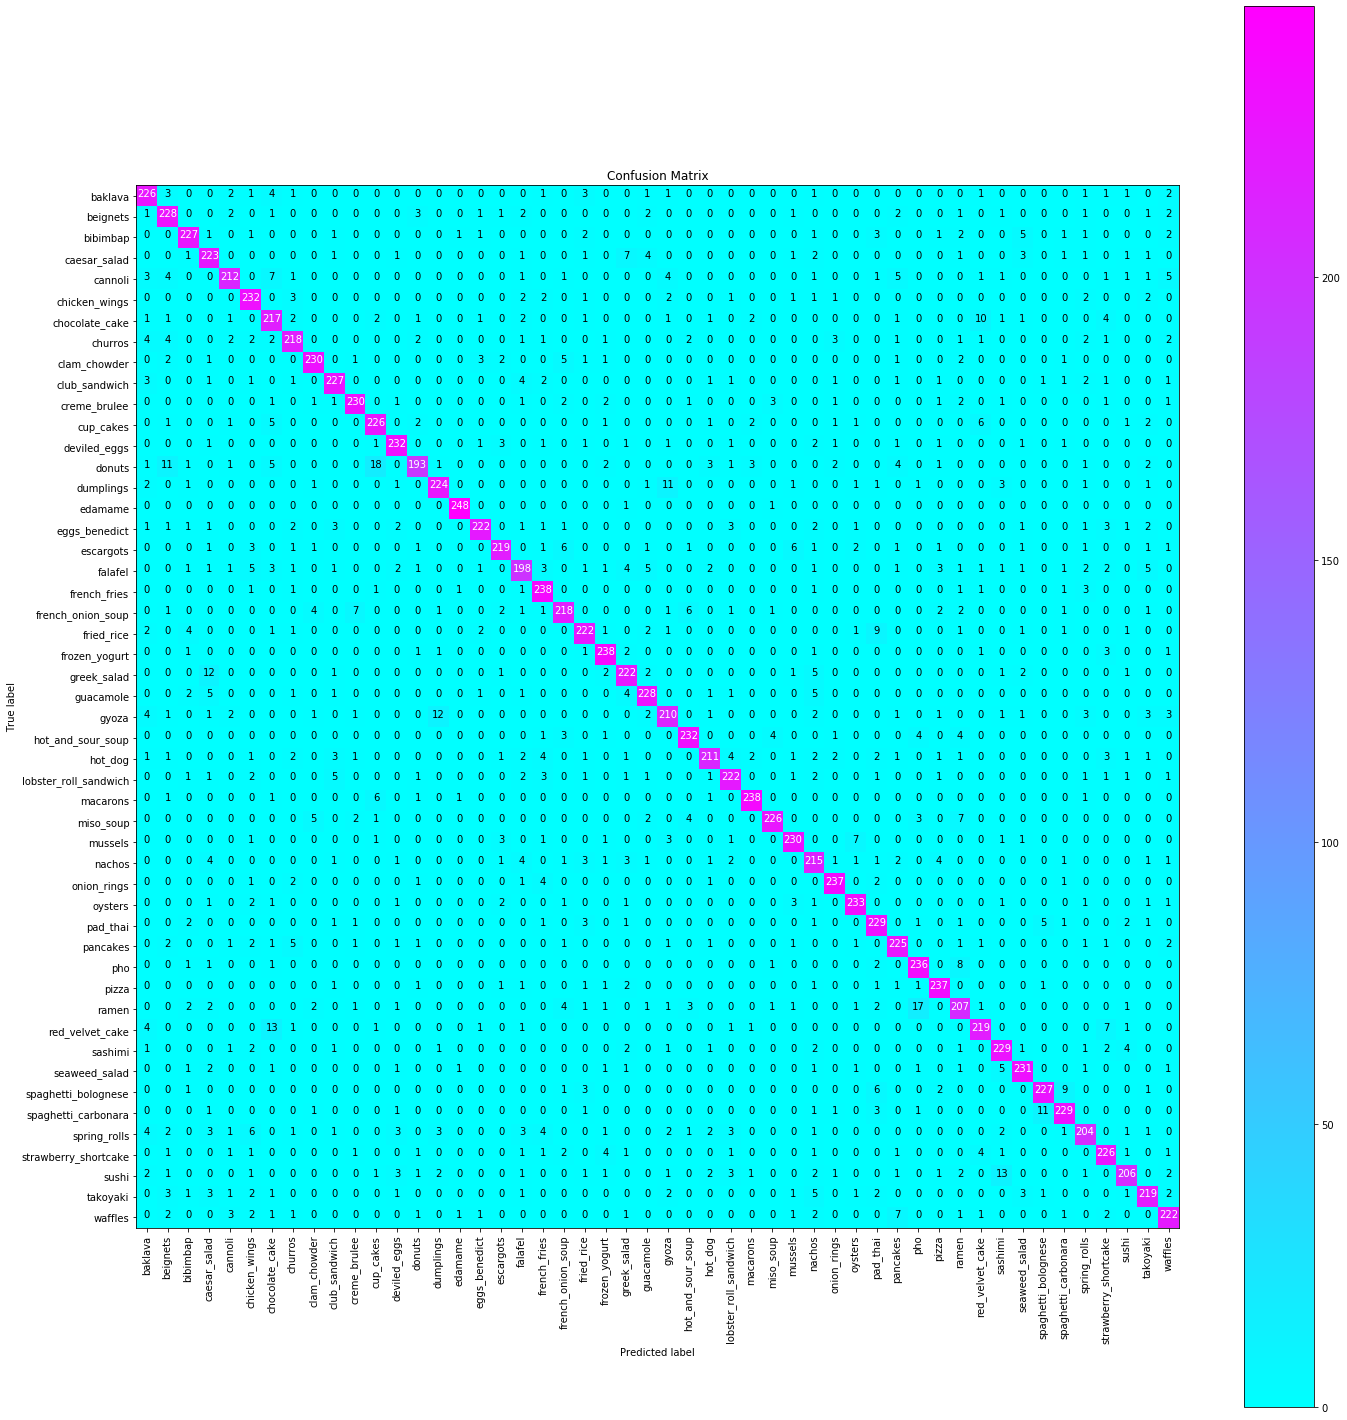

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    fungsi ini akan buat plot confusion matrix. 
    jk normalisasi, set `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix, Normalisasi")
    else:
        print('Confusion Matrix, Tanpa Normalisasi')

    print(cm)

    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# hitungan
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

class_names = labels

plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 20)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix',
                      cmap=plt.cm.cool)
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[226,   3,   0, ...,   1,   0,   2],
       [  1, 228,   0, ...,   0,   1,   2],
       [  0,   0, 227, ...,   0,   0,   2],
       ...,
       [  2,   1,   0, ..., 206,   0,   2],
       [  0,   3,   1, ...,   1, 219,   2],
       [  0,   2,   0, ...,   0,   0, 222]], dtype=int64)

In [12]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# sensitivitas atau true positive rate
TPR = TP/(TP+FN)
# spesifisitas atau true negative rate
TNR = TN/(FP+TN) 
# presisi 
PPV = TP/(TP+FP)
# nilai presisi negatif
NPV = TN/(TN+FN)
# false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# akurasi keseluruhan
ACC = (TP+TN)/(TP+FP+FN+TN)
# akurasi tiap kelas rumus lain
accu = (TP+TN)/101927
#error
ERROR = (FP+FN)/(TP+FP+FN+TN)

In [18]:
# sensitivitas atau true positive rate
print(TPR)

[0.9  0.91 0.91 0.89 0.85 0.93 0.87 0.87 0.92 0.91 0.92 0.9  0.93 0.77
 0.9  0.99 0.89 0.88 0.79 0.95 0.87 0.89 0.95 0.89 0.91 0.84 0.93 0.84
 0.89 0.95 0.9  0.92 0.86 0.95 0.93 0.92 0.9  0.94 0.95 0.83 0.88 0.92
 0.92 0.91 0.92 0.82 0.9  0.82 0.88 0.89]


In [19]:
# spesifisitas atau true negative rate
print(TNR)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [20]:
# presisi 
print(PPV)

[0.87 0.84 0.92 0.84 0.91 0.86 0.82 0.89 0.93 0.91 0.93 0.88 0.92 0.91
 0.91 0.98 0.94 0.93 0.85 0.88 0.89 0.89 0.91 0.87 0.9  0.86 0.93 0.91
 0.9  0.96 0.95 0.92 0.82 0.94 0.93 0.86 0.88 0.89 0.92 0.83 0.88 0.87
 0.91 0.92 0.91 0.88 0.87 0.91 0.89 0.88]


In [21]:
# nilai presisi negatif
print(NPV)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [22]:
# false positive rate
print(FPR)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [23]:
# False negative rate
print(FNR)

[0.1  0.09 0.09 0.11 0.15 0.07 0.13 0.13 0.08 0.09 0.08 0.1  0.07 0.23
 0.1  0.01 0.11 0.12 0.21 0.05 0.13 0.11 0.05 0.11 0.09 0.16 0.07 0.16
 0.11 0.05 0.1  0.08 0.14 0.05 0.07 0.08 0.1  0.06 0.05 0.17 0.12 0.08
 0.08 0.09 0.08 0.18 0.1  0.18 0.12 0.11]


In [24]:
# False discovery rate
print(FDR)

[0.13 0.16 0.08 0.16 0.09 0.14 0.18 0.11 0.07 0.09 0.07 0.12 0.08 0.09
 0.09 0.02 0.06 0.07 0.15 0.12 0.11 0.11 0.09 0.13 0.1  0.14 0.07 0.09
 0.1  0.04 0.05 0.08 0.18 0.06 0.07 0.14 0.12 0.11 0.08 0.17 0.12 0.13
 0.09 0.08 0.09 0.12 0.13 0.09 0.11 0.12]


In [25]:
# akurasi keseluruhan
print(ACC)

[1.   0.99 1.   0.99 1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99
 1.   1.   1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99 1.   1.
 1.   1.   1.   1.   0.99 1.   1.   1.   1.   1.   1.   0.99 1.   1.
 1.   1.   1.   0.99 1.   0.99 1.   1.  ]


In [13]:
#true positive
print(TP)

[226. 228. 227. 223. 212. 232. 217. 218. 230. 227. 230. 226. 232. 193.
 224. 248. 222. 219. 198. 238. 218. 222. 238. 222. 228. 210. 232. 211.
 222. 238. 226. 230. 215. 237. 233. 229. 225. 236. 237. 207. 219. 229.
 231. 227. 229. 204. 226. 206. 219. 222.]


In [14]:
#true negative
print(TN)

[12216. 12208. 12229. 12207. 12230. 12213. 12201. 12223. 12234. 12228.
 12234. 12218. 12230. 12231. 12229. 12245. 12237. 12233. 12215. 12218.
 12222. 12223. 12227. 12217. 12225. 12217. 12232. 12230. 12226. 12239.
 12239. 12230. 12202. 12234. 12232. 12214. 12218. 12221. 12229. 12209.
 12221. 12217. 12228. 12231. 12227. 12221. 12217. 12230. 12222. 12219.]


In [15]:
#false positive
print(FP)

[34. 42. 21. 43. 20. 37. 49. 27. 16. 22. 16. 32. 20. 19. 21.  5. 13. 17.
 35. 32. 28. 27. 23. 33. 25. 33. 18. 20. 24. 11. 11. 20. 48. 16. 18. 36.
 32. 29. 21. 41. 29. 33. 22. 19. 23. 29. 33. 20. 28. 31.]


In [16]:
#false negative
print(FN)

[24. 22. 23. 27. 38. 18. 33. 32. 20. 23. 20. 24. 18. 57. 26.  2. 28. 31.
 52. 12. 32. 28. 12. 28. 22. 40. 18. 39. 28. 12. 24. 20. 35. 13. 17. 21.
 25. 14. 13. 43. 31. 21. 19. 23. 21. 46. 24. 44. 31. 28.]


In [17]:
#error
print(ERROR)

[0.   0.01 0.   0.01 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.
 0.   0.   0.   0.01 0.   0.01 0.   0.  ]


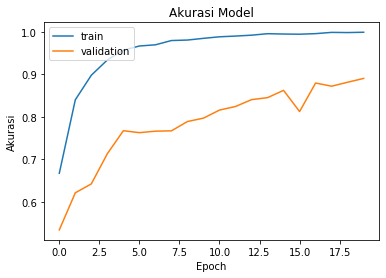

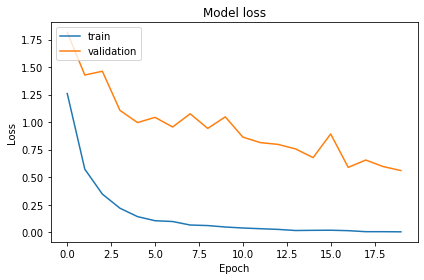

In [7]:
# summarize history for accuracy
log_data = pd.read_csv('model-resnet50_PENTING/training.log')
plt.plot(log_data['acc'])
plt.plot(log_data['val_acc'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()